In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_45600_G')

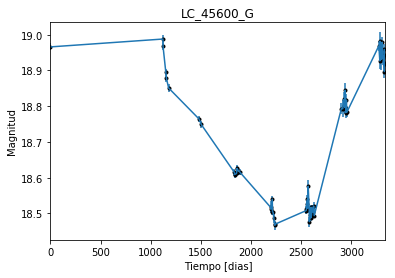

In [2]:
data = np.genfromtxt('LC_45600_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_45600_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

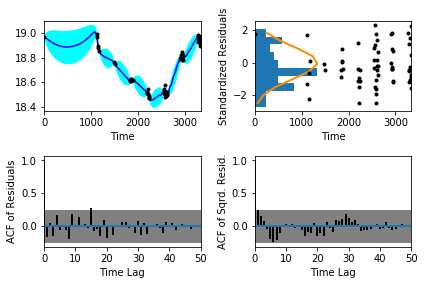

In [5]:
sample.assess_fit()

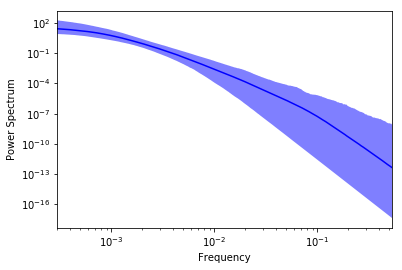

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_45600_G')

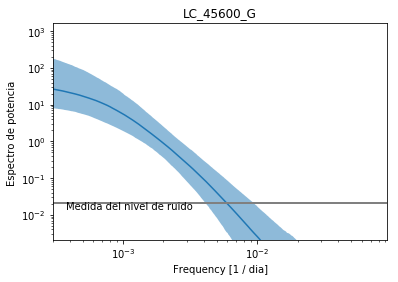

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_45600_G')

Text(0.5,1,'Prediccion , valor esperado LC_45600_G')

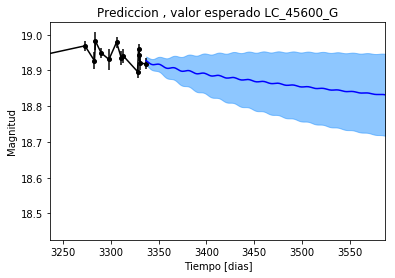

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_45600_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_45600_G')

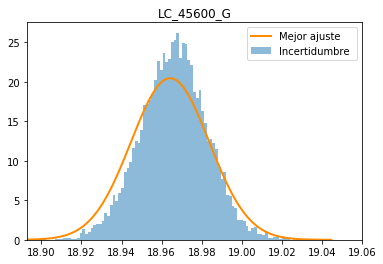

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_45600_G')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_G')

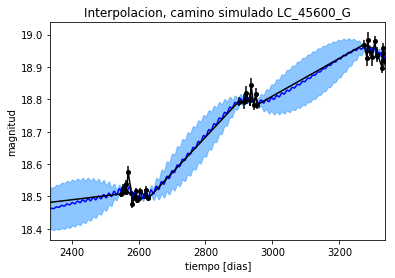

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_G')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_G')

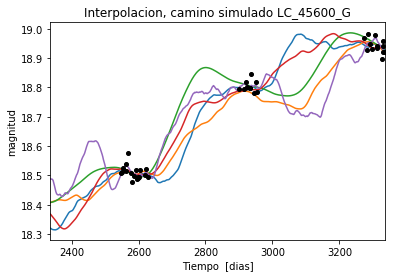

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_G')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 504.201862109
Median: 0.0230862317553
Standard deviation: 0.2154696657
68% credibility interval: [ 0.0017227   0.25745627]
95% credibility interval: [  4.18571359e-04   8.09833970e-01]
99% credibility interval: [  3.16975308e-04   1.02115288e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 551.444818427
Median: 0.00179009552264
Standard deviation: 0.106339001201
68% credibility interval: [ 0.00043963  0.0280994 ]
95% credibility interval: [  3.15194252e-04   3.89417008e-01]
99% credibility interval: [  3.01571869e-04   7.95436278e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 459.350809154
Median: 0.00923990580531
S

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1182.49864357
Median: 160.338606928
Standard deviation: 1.66773579366
68% credibility interval: [ 158.54013942  161.67416419]
95% credibility interval: [ 156.19649916  162.51365424]
99% credibility interval: [ 154.08525172  162.86304862]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 385.846246272
Median: 0.790751843423
Standard deviation: 2.26093627716
68% credibility interval: [ 0.07122745  4.02718351]
95% credibility interval: [ 0.0154014   7.56382005]
99% credibility interval: [  9.73772302e-03   1.11220701e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 360.667454634
Median: 0.323670475529
Standard deviation: 9.02432207306
68% credibility interval: [ 0.01867902  6.23521668]
95% credibility interval: [  1.5

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15754.9640508
Median: 1.71673411395e-20
Standard deviation: 1.1421672099e+141
68% credibility interval: [  2.88596568e-42   3.50083431e-07]
95% credibility interval: [  1.03825068e-93   2.04736903e+02]
99% credibility interval: [  3.07782888e-105   1.70953725e+130]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 4441.75745249
Median: 18.799602518
Standard deviation: 0.130751620997
68% credibility interval: [ 18.69280524  18.91721093]
95% credibility interval: [ 18.55457909  19.08478785]
99% credibility interval: [ 18.42063071  19.22813567]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 261.805482068
Median: 0.0
Standard deviation: 0.230605316633
68% credibility interval: [ 0.          0.25217265]
95% credibility interval: [ 0.          0.87525914]
99% credibility interval: [ 0.          1.01907733]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 261.805482068
Median: 0.0
Standard deviation: 0.230605316633
68% credibility interval: [ 0.          0.25217265]
95% credibility interval: [ 0.          0.87525914]
99% credibility interval: [ 0.          1.01907733]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1448.3445045
Median: 0.0
Standard deviation: 0.000217177138378
68% credibility interval: [  0.

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1182.49864357
Median: 160.338606928
Standard deviation: 1.66773579366
68% credibility interval: [ 158.54013942  161.67416419]
95% credibility interval: [ 156.19649916  162.51365424]
99% credibility interval: [ 154.08525172  162.86304862]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1638.70423674
Median: 0.047766102714
Standard deviation: 0.0673359899382
68% credibility interval: [ 0.02694604  0.10440401]
95% credibility interval: [ 0.01739827  0.24341119]
99% credibility interval: [ 0.01366432  0.41964489]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1582.09937342
Median: 1.42054719576
Standard deviation: 0.207800919703
68% credibility interval: [ 1.22655448  1.64921034]
95% credibility interval: [ 1.07161181  1.88758817]
99% credibility interval: [ 0.99184752  1.96494813]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 937.005892476
Median: 6.77066647879e-05
Standard deviation: 0.00614380925098
68% credibility interval: [  2.93468637e-06   1.50599864e-03]
95% credibility interval: [  4.72906535e-08   9.73230018e-03]
99% credibility interval: [  1.98286899e-135   1.91456776e-002]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 504.201862109
Median: (-0.145055072163+0j)
Standard deviation: 1.98299945172
68% credibility interval: [-1.61764546+0.j        -0.01082402-3.7808219j]
95% credibility interval: [ -5.08833690e+00-4.9045814j   -2.62996142e-03-5.46190099j]
99% credibility interval: [ -6.41609280e+00+0.j         -1.99161460e-03-0.0213981j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 551.444818427
Median: (-0.0112475018863+0j)
Standard deviation: 1.59556780874
68% credibility interval: [-0.17655374+2.09503717j -0.00276229+0.j        ]
95% credibility interval: [ -2.44677923e+00+0.11513533j  -1.98042389e-03+0.j        ]
99% credibility interval: [ -4.99787354e+00+4.03404828j  -1.89483194e-03+0.j        ]
Posterior summary for parameter a